In [1]:
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb
import cv2

In [2]:
img = read("Sandip.jpg")
img = cv2.resize(img, (224, 224))

In [3]:
segments_fz = felzenszwalb(img, scale=200)

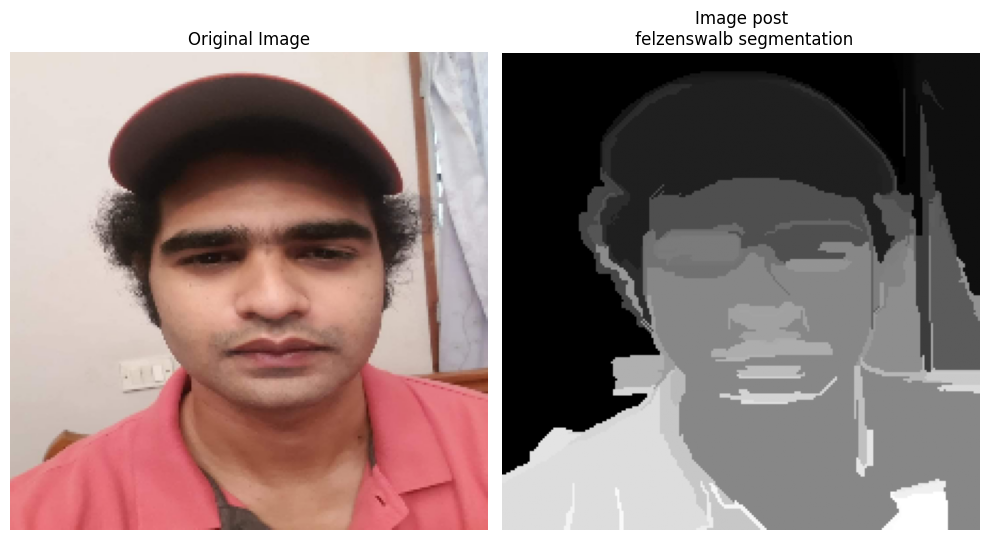

In [4]:
subplots([img, segments_fz], titles=["Original Image", "Image post\n felzenswalb segmentation"], sz=10, nc=2)

In [7]:
import selectivesearch
import numpy as np

def extract_candidates(img):
    """
    This function fetches the region proposals from an image using selective search.
    
    Arguments:
    img -- input image (numpy array)
    
    Returns:
    candidates -- list of bounding box coordinates representing region proposals
    """
    
    # Perform selective search to generate region proposals
    # scale: controls the scale of segmentation (higher values increase segmentation granularity)
    # min_size: the minimum region size to consider as a valid proposal
    img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    
    # Calculate the total area of the input image (height * width)
    img_area = np.prod(img.shape[:2])
    
    # Initialize an empty list to store the valid candidate regions (bounding boxes)
    candidates = []
    
    # Iterate over each region proposal from the selective search
    for r in regions:
        # Skip this region if it's already added to the candidates list (avoid duplicates)
        if r["rect"] in candidates:
            continue
        
        # Skip regions that are smaller than 5% of the image area (too small)
        if r["size"] < (0.05 * img_area):
            continue
        
        # Skip regions that occupy more than 100% of the image area (too large)
        if r["size"] > (1 * img_area):
            continue
        
        # Extract the coordinates of the bounding box (x, y, width, height)
        x, y, w, h = r["rect"]
        
        # Add the bounding box coordinates to the candidates list
        candidates.append(list(r["rect"]))
    
    # Return the list of valid candidate regions
    return candidates


c:\Users\SANDIP\Desktop\Vscode_projects\Computer_vision\.venv\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


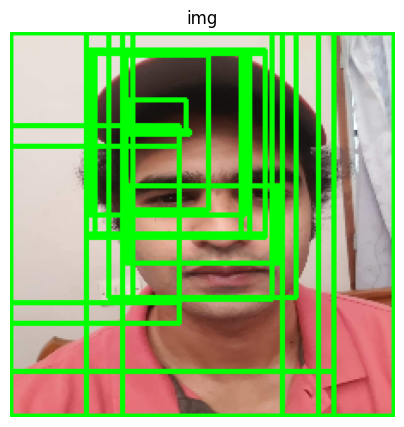

In [8]:
candidates = extract_candidates(img)
show(img, bbs=candidates)